<a href="https://colab.research.google.com/github/Ram0kr0singh/DSA_Assignment/blob/main/DSA_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sorting Algorithm Comparison**

In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

In [3]:

def selection_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if a[j] < a[min_index]:
                min_index = j
        a[i], a[min_index] = a[min_index], a[i]
    return a

In [4]:

def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j] = a[j+1]
            j -= 1
        a[j+1] = key
    return a

In [5]:

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

In [6]:

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    mid  = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

In [7]:
# ---------------------- Measuring Time ----------------------

def measure_time(sort_func, arr):
    start = time.time()
    sort_func(arr)
    end = time.time()
    return end - start

In [8]:
# Test sizes
sizes = [100, 200, 300, 400, 500]

bubble_times = []
selection_times = []
insertion_times = []
merge_times = []
quick_times = []

for size in sizes:
    arr = random.sample(range(size * 10), size)

    bubble_times.append(measure_time(bubble_sort, arr))
    selection_times.append(measure_time(selection_sort, arr))
    insertion_times.append(measure_time(insertion_sort, arr))
    merge_times.append(measure_time(merge_sort, arr))
    quick_times.append(measure_time(quick_sort, arr))

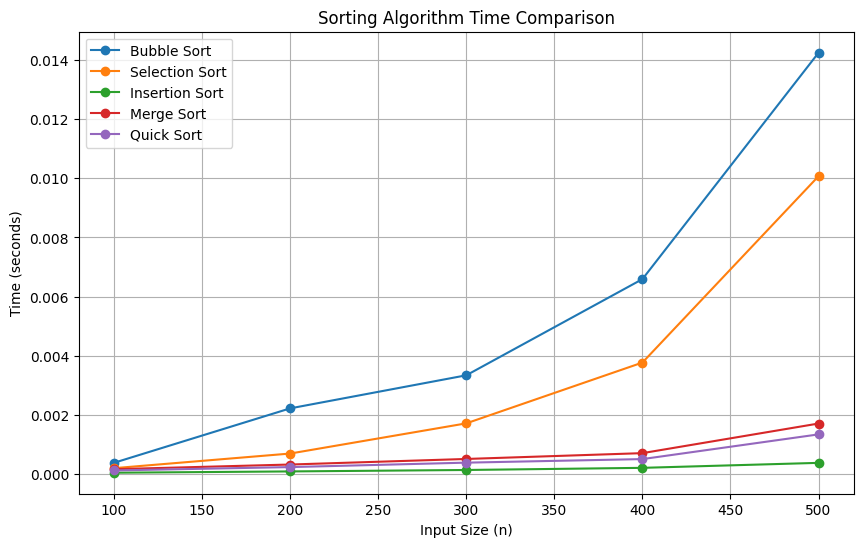

In [9]:
# ---------------------- Plotting ----------------------

plt.figure(figsize=(10, 6))
plt.plot(sizes, bubble_times, marker='o', label='Bubble Sort')
plt.plot(sizes, selection_times, marker='o', label='Selection Sort')
plt.plot(sizes, insertion_times, marker='o', label='Insertion Sort')
plt.plot(sizes, merge_times, marker='o', label='Merge Sort')
plt.plot(sizes, quick_times, marker='o', label='Quick Sort')

plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Sorting Algorithm Time Comparison")
plt.legend()
plt.grid(True)
plt.show()